<a href="https://colab.research.google.com/github/Reetubharti20/projects/blob/master/Energy_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [295]:
df = pd.read_csv('/content/drive/MyDrive/Vipul_Assignment/Energy_Report.csv')

In [296]:
df.head()

,trading date,delivery date,delivery time,fixing rate1(PLN/MWh),fixing volume1(MWh),fixing rate2 (PLN/MWh),fixing volume2 (MWh),continuous quotation rate (PLN/MWh),volume of continuous quotes (MWh)
0,31-12-2016,01-01-2017,1,107.52,1890.9,105.61,347.1,102.95,69.9
1,31-12-2016,01-01-2017,2,104.40,2287.6,105.61,355.8,100.88,75
2,31-12-2016,01-01-2017,3,83.66,2243.8,105.57,424.4,81.51,24.8
3,31-12-2016,01-01-2017,4,75.15,2403.6,101.26,641.3,74.13,69
4,31-12-2016,01-01-2017,5,74.99,2441.7,82.93,640.6,73.13,68.9


In [297]:
#df['hour'] = pd.to_numeric(df['delivery time'], errors='coerce')

# Drop rows with NaN values in the 'hour' column
#df = df.dropna(subset=['hour'])


In [298]:
#df['hour'].unique()

In [299]:
df.isna().sum()

trading date                           0
delivery date                          0
delivery time                          0
fixing rate1(PLN/MWh)                  0
fixing volume1(MWh)                    0
fixing rate2 (PLN/MWh)                 0
fixing volume2 (MWh)                   0
continuous quotation rate (PLN/MWh)    0
 volume of continuous quotes (MWh)     0
dtype: int64

In [300]:
df.duplicated().sum()

0

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30671 entries, 0 to 30670
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   trading date                         30671 non-null  object 
 1   delivery date                        30671 non-null  object 
 2   delivery time                        30671 non-null  object 
 3   fixing rate1(PLN/MWh)                30671 non-null  float64
 4   fixing volume1(MWh)                  30671 non-null  float64
 5   fixing rate2 (PLN/MWh)               30671 non-null  float64
 6   fixing volume2 (MWh)                 30671 non-null  float64
 7   continuous quotation rate (PLN/MWh)  30671 non-null  object 
 8    volume of continuous quotes (MWh)   30671 non-null  object 
dtypes: float64(4), object(5)
memory usage: 2.1+ MB


In [302]:
# date column to datetime format
df['date'] = pd.to_datetime(df['trading date'])
df['hour'] = pd.to_numeric(df['delivery time'], errors='coerce')  # remove non-numeric values

df = df.dropna(subset=['hour'])
# Create a datetime column by combining date and hour
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'] - 1, unit='h')


In [303]:
df.head()

,trading date,delivery date,delivery time,fixing rate1(PLN/MWh),fixing volume1(MWh),fixing rate2 (PLN/MWh),fixing volume2 (MWh),continuous quotation rate (PLN/MWh),volume of continuous quotes (MWh),date,hour,datetime
0,31-12-2016,01-01-2017,1,107.52,1890.9,105.61,347.1,102.95,69.9,2016-12-31,1.0,2016-12-31 00:00:00
1,31-12-2016,01-01-2017,2,104.40,2287.6,105.61,355.8,100.88,75,2016-12-31,2.0,2016-12-31 01:00:00
2,31-12-2016,01-01-2017,3,83.66,2243.8,105.57,424.4,81.51,24.8,2016-12-31,3.0,2016-12-31 02:00:00
3,31-12-2016,01-01-2017,4,75.15,2403.6,101.26,641.3,74.13,69,2016-12-31,4.0,2016-12-31 03:00:00
4,31-12-2016,01-01-2017,5,74.99,2441.7,82.93,640.6,73.13,68.9,2016-12-31,5.0,2016-12-31 04:00:00


In [304]:
# Drop the extra columns
df.drop(columns=['hour','date','trading date','delivery date','delivery time'], inplace=True)

In [305]:
# df = df.drop(['delivery date','delivery time'], axis=1)
# df.set_index(['trading date'],append = True, drop= True)

In [306]:
df.index = df['datetime']

In [307]:
df = df.drop('datetime', axis=1)

In [308]:

df.head(1)

,fixing rate1(PLN/MWh),fixing volume1(MWh),fixing rate2 (PLN/MWh),fixing volume2 (MWh),continuous quotation rate (PLN/MWh),volume of continuous quotes (MWh)
datetime,,,,,,
2016-12-31,107.52,1890.9,105.61,347.1,102.95,69.9


In [310]:
df.describe()

,fixing rate1(PLN/MWh),fixing volume1(MWh),fixing rate2 (PLN/MWh),fixing volume2 (MWh)
count,30668.000000,30668.000000,30668.000000,30668.000000
mean,200.657516,1997.664259,199.483877,858.017791
std,65.708812,601.669954,64.493527,321.921423
min,31.000000,645.200000,5.010000,30.800000
25%,155.307500,1572.200000,155.080000,609.700000
50%,192.860000,1915.100000,192.200000,854.250000
75%,237.000000,2332.500000,235.800000,1136.500000
max,1199.530000,5860.400000,1035.750000,2085.800000


<Axes: xlabel='datetime'>

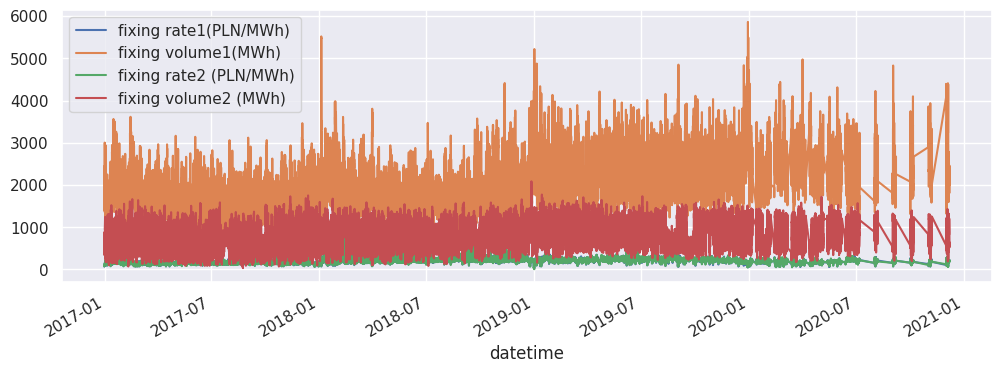

In [311]:
df.plot(figsize=(12,4)) # plot everything to see the pattern

In [312]:
df1 = df
df1 = df1.drop(['continuous quotation rate (PLN/MWh)',' volume of continuous quotes (MWh)'],axis = 1)
df1.head()

,fixing rate1(PLN/MWh),fixing volume1(MWh),fixing rate2 (PLN/MWh),fixing volume2 (MWh)
datetime,,,,
2016-12-31 00:00:00,107.52,1890.9,105.61,347.1
2016-12-31 01:00:00,104.40,2287.6,105.61,355.8
2016-12-31 02:00:00,83.66,2243.8,105.57,424.4
2016-12-31 03:00:00,75.15,2403.6,101.26,641.3
2016-12-31 04:00:00,74.99,2441.7,82.93,640.6


<Axes: xlabel='datetime'>

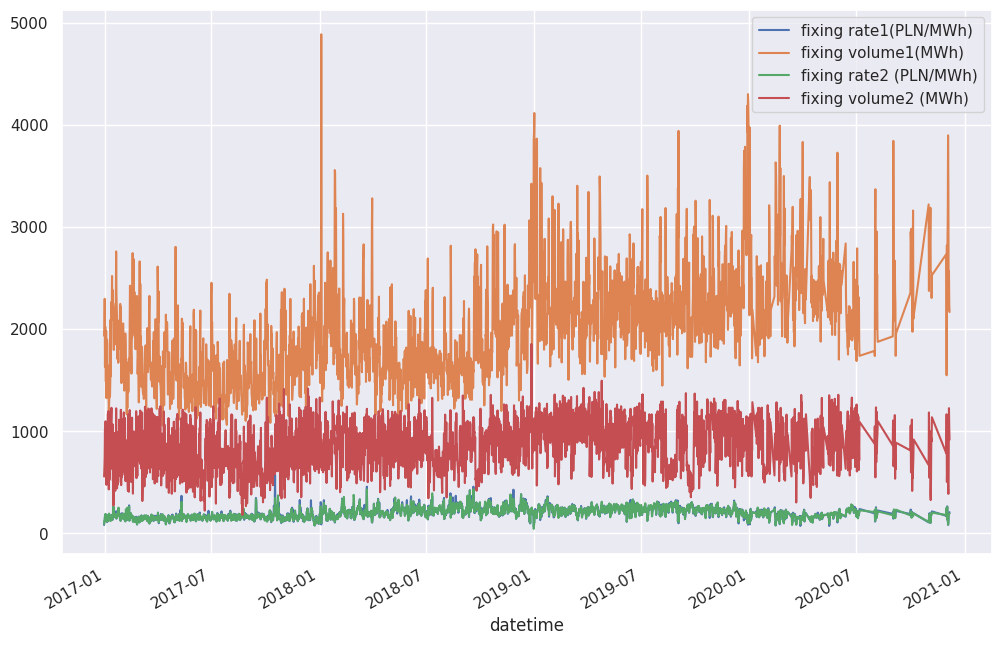

In [313]:
# calculated mean data in every 12 hrs and plotted
hr12avg = df1.groupby(pd.Grouper(freq='12H')).mean()
hr12avg.dropna().plot()

<Axes: xlabel='datetime'>

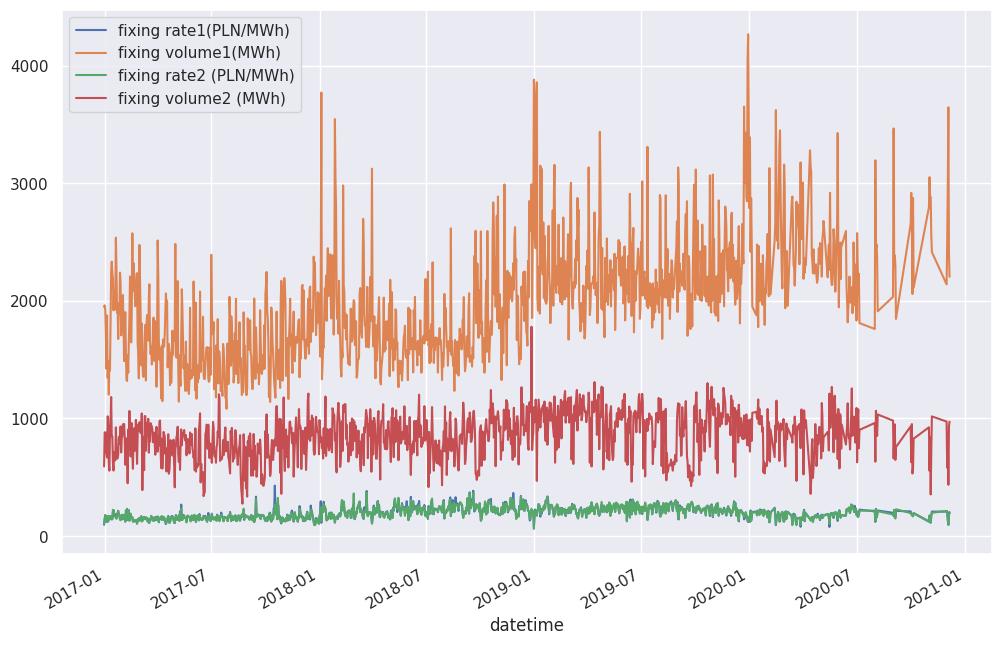

In [314]:
# calculated mean data in every 24 hrs and plotted
hrs24avg = df1.groupby(pd.Grouper(freq='24H')).mean()
hrs24avg.dropna().plot()


<Axes: xlabel='datetime'>

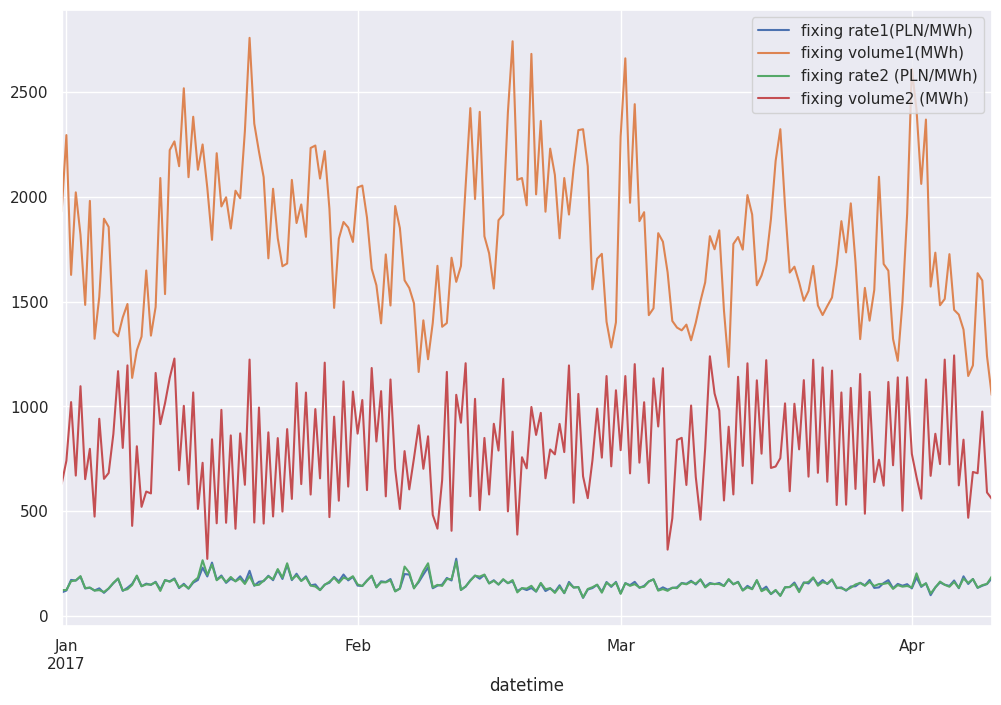

In [315]:
# we can see the irregularity so considering subset to know the pattern precisely
#hr12avg = df1.groupby(pd.Grouper(freq='12H')).mean()
hr12avg[1:200].dropna().plot()

In [316]:
import warnings
warnings.filterwarnings('ignore')

#resample
B: Business day frequency
D: Calendar day frequency
W: Weekly frequency
M: Month end frequency
Q: Quarter end frequency
A: Year end frequency
H: Hourly frequency

In [317]:
#we can also check with resample with different rule
# applying resampling in meanof data calculated earlier
# considering only fixed volume1 column
resamp = hr12avg['fixing volume1(MWh)'].groupby(level='datetime').resample('M', level='datetime').mean()


In [318]:
len(resamp)

2874

<Axes: xlabel='datetime,datetime'>

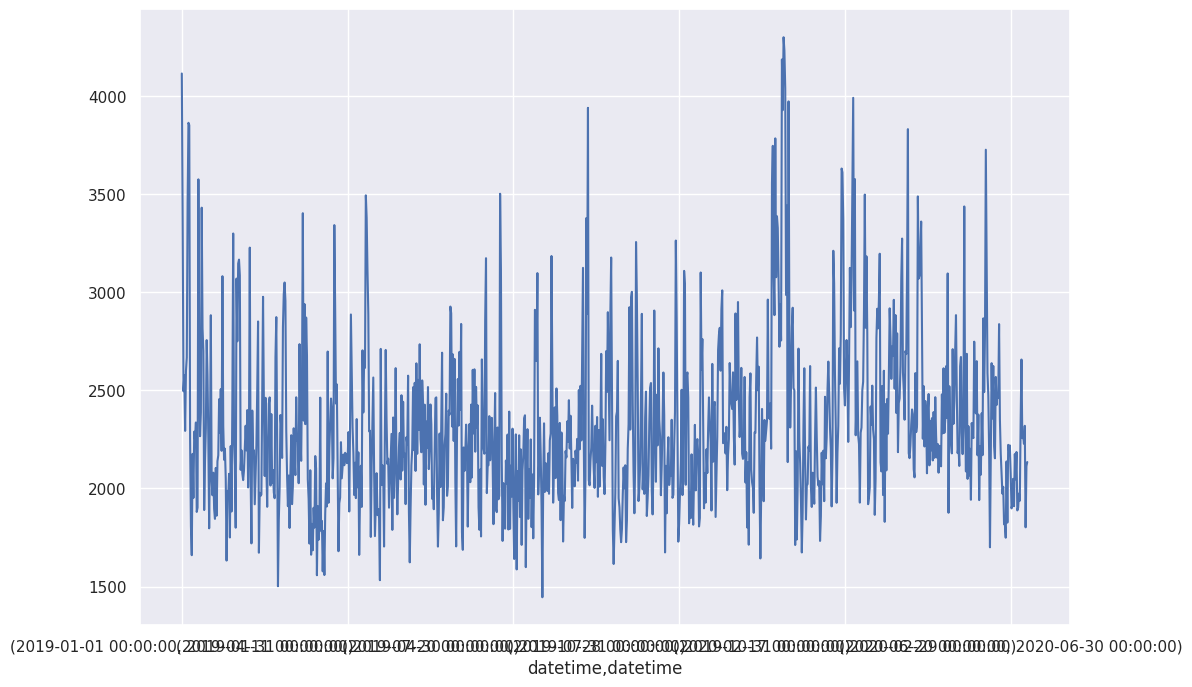

In [319]:
resamp.loc['2019-01-01':'2020-06-30'].dropna().plot() # plotted data of since 01-01-2019

In [320]:
# figure,axis=plt.subplots(figsize=(12,4))
# figure.autofmt_xdate()
# axis.plot(df.groupby(level='delivery time').resample('Q', level='trading date').mean())

<Axes: xlabel='datetime,datetime'>

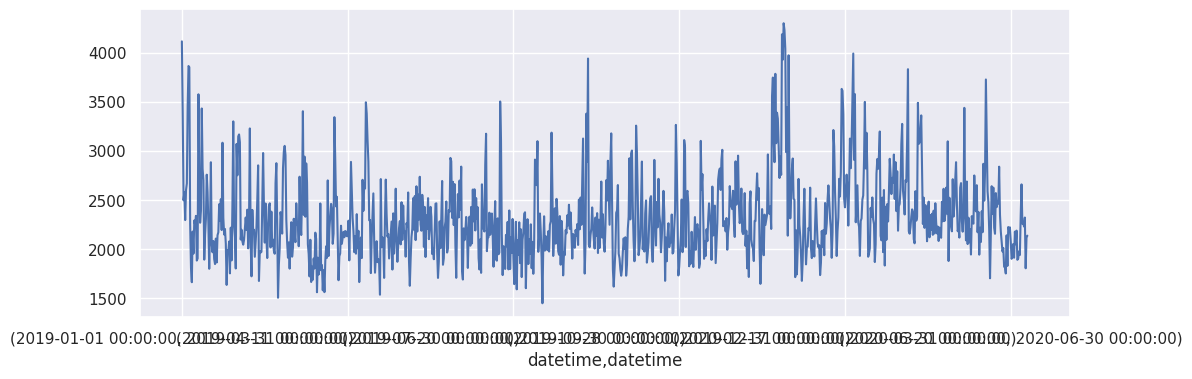

In [321]:
resamp = hr12avg['fixing volume1(MWh)'].groupby(level='datetime').resample('Q', level='datetime').mean()
resamp.loc['2019-01-01':'2020-06-30'].dropna().plot(figsize=(12,4)) # plotted data of since 01-01-2019

In [322]:
df2 = df
df2.columns


Index(['fixing rate1(PLN/MWh)', 'fixing volume1(MWh)',
       'fixing rate2 (PLN/MWh)', 'fixing volume2 (MWh)',
       'continuous quotation rate (PLN/MWh)',
       ' volume of continuous quotes (MWh)'],
      dtype='object')

array([[<Axes: title={'center': 'fixing volume1(MWh)'}>,
        <Axes: title={'center': 'fixing volume2 (MWh)'}>]], dtype=object)

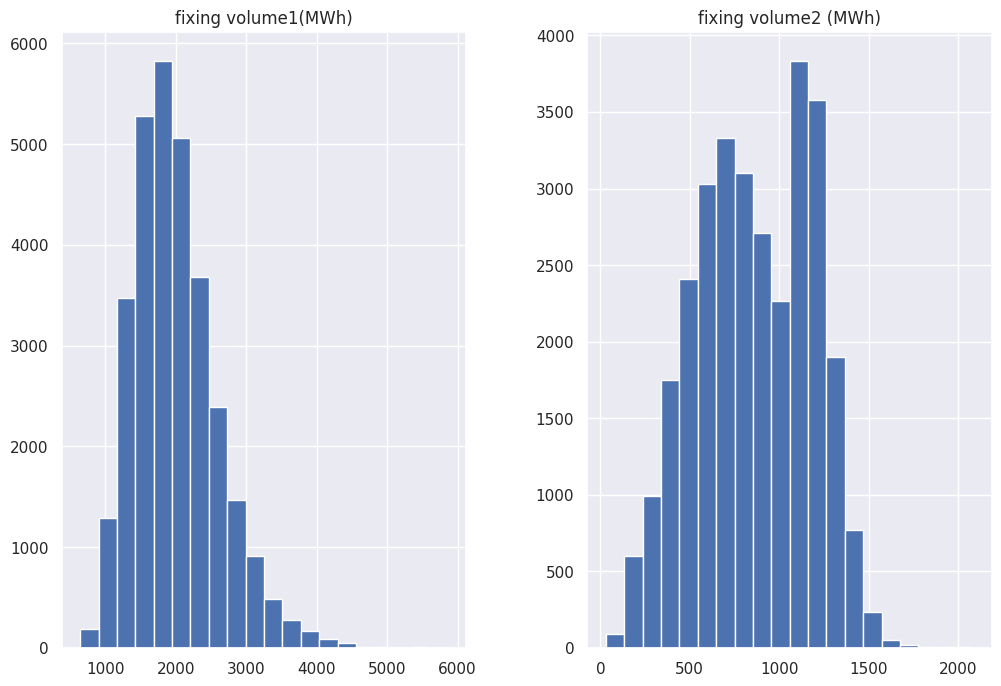

In [323]:
df2 = df2.drop(['fixing rate1(PLN/MWh)','fixing rate2 (PLN/MWh)','continuous quotation rate (PLN/MWh)',' volume of continuous quotes (MWh)'],axis=1)
df2.hist(bins=20)

In [324]:
#  to do EDA with multiindex.    reading data again
data = pd.read_csv('/content/drive/MyDrive/Vipul_Assignment/Energy_Report.csv')

In [325]:
data['date'] = pd.to_datetime(data['trading date'])

In [326]:
data.set_index(['date', 'delivery time'], inplace=True)

In [327]:
data.head(3)

trading date delivery date  fixing rate1(PLN/MWh)  \
date       delivery time                                                     
2016-12-31 1               31-12-2016    01-01-2017                 107.52   
           2               31-12-2016    01-01-2017                 104.40   
           3               31-12-2016    01-01-2017                  83.66   

                          fixing volume1(MWh)  fixing rate2 (PLN/MWh)  \
date       delivery time                                                
2016-12-31 1                           1890.9                  105.61   
           2                           2287.6                  105.61   
           3                           2243.8                  105.57   

                          fixing volume2 (MWh)  \
date       delivery time                         
2016-12-31 1                             347.1   
           2                             355.8   
           3                             424.4   

                         continuous quotation rate (PLN/MWh)  \
date       delivery time                                       
2016-12-31 1                                          102.95   
           2                                          100.88   
           3                                           81.51   

                          volume of continuous quotes (MWh)  
date       delivery time                                     
2016-12-31 1                                           69.9  
           2                                             75  
           3                                           24.8

In [328]:
data.drop(['delivery date','trading date'], axis = 1, inplace=True)

<Axes: xlabel='delivery time,date'>

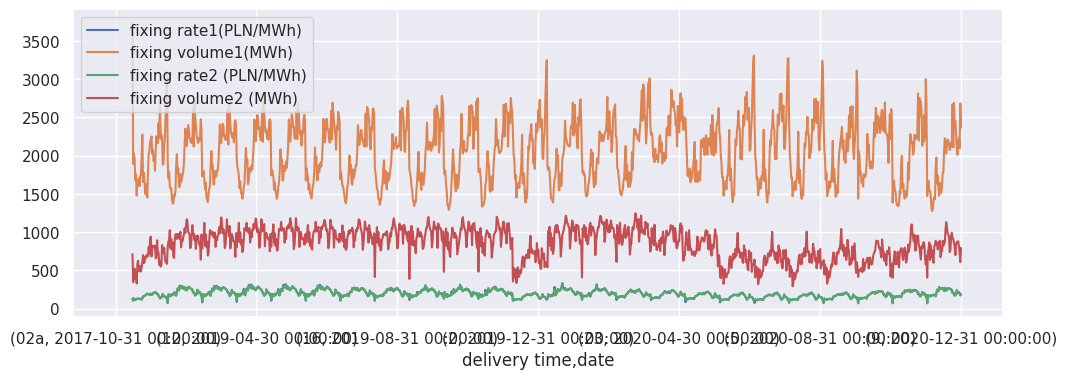

In [329]:
grouped_mean = data.groupby(level='delivery time').resample(rule='M', level='date').mean()

# Plot the data
grouped_mean.plot(figsize=(12, 4))

here we can see some trnds in sample

<Axes: xlabel='delivery time,date'>

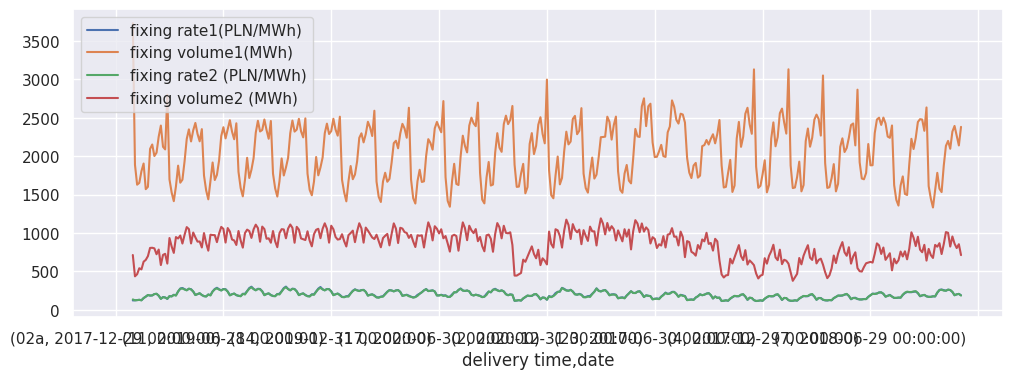

In [330]:
# Business Quarter end frequency
data.groupby(level='delivery time').resample(rule='BQ', level='date').mean().plot(figsize=(12,4))

In [331]:
#data_roll = data[['fixing rate1(PLN/MWh)','fixing volume1(MWh)']].rolling(3).mean().dropna()

In [332]:
import seaborn as sns

<Axes: xlabel='date', ylabel='fixing rate1(PLN/MWh)'>

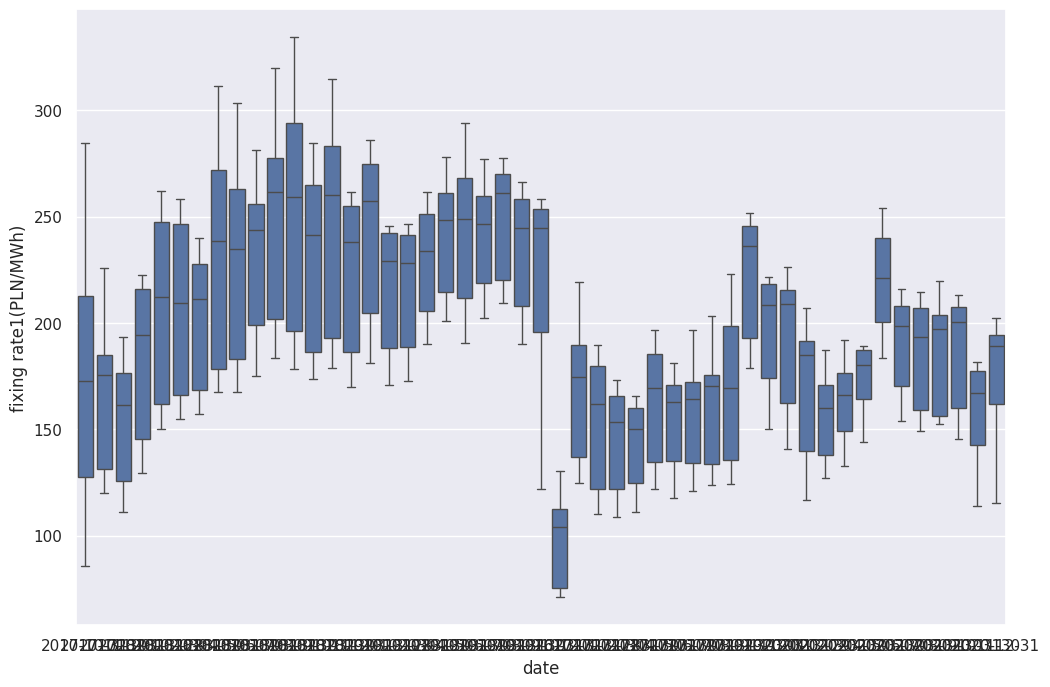

In [333]:
# we can see the mean and quantile of monthly avg data using boxplot
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x="date", y="fixing rate1(PLN/MWh)", data=grouped_mean)

In [334]:
data_agg1 = grouped_mean[:][['fixing rate1(PLN/MWh)','fixing volume1(MWh)']].groupby('date').agg({'fixing volume1(MWh)':['min','max']})

<Axes: xlabel='date'>

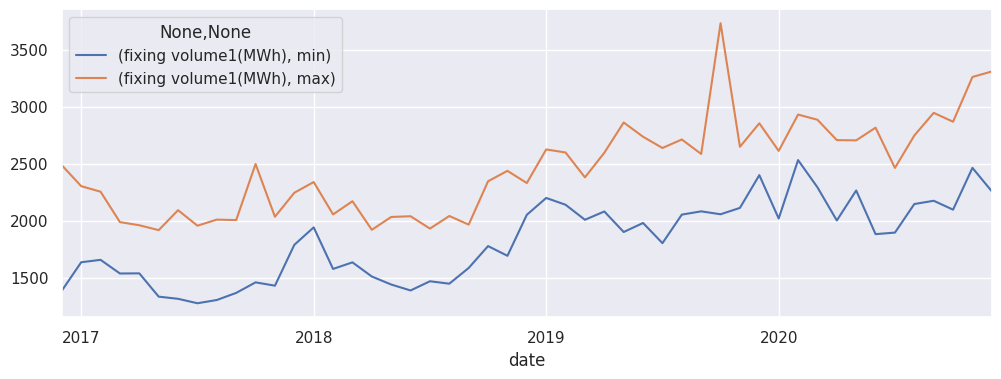

In [335]:
data_agg1.dropna().plot(figsize=(12,4))

In [336]:
data_agg2 = grouped_mean[:][['fixing rate2 (PLN/MWh)','fixing volume2 (MWh)']].groupby('date').agg({'fixing volume2 (MWh)':['min','max']})

<Axes: xlabel='date'>

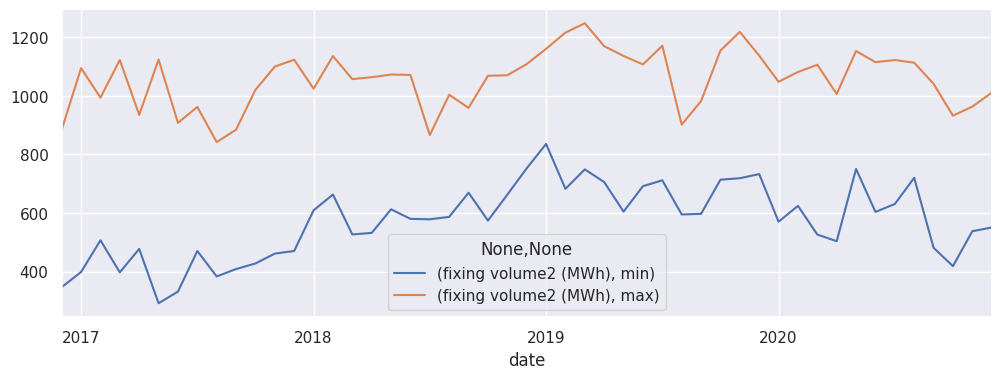

In [337]:
data_agg2.dropna().plot(figsize=(12,4))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

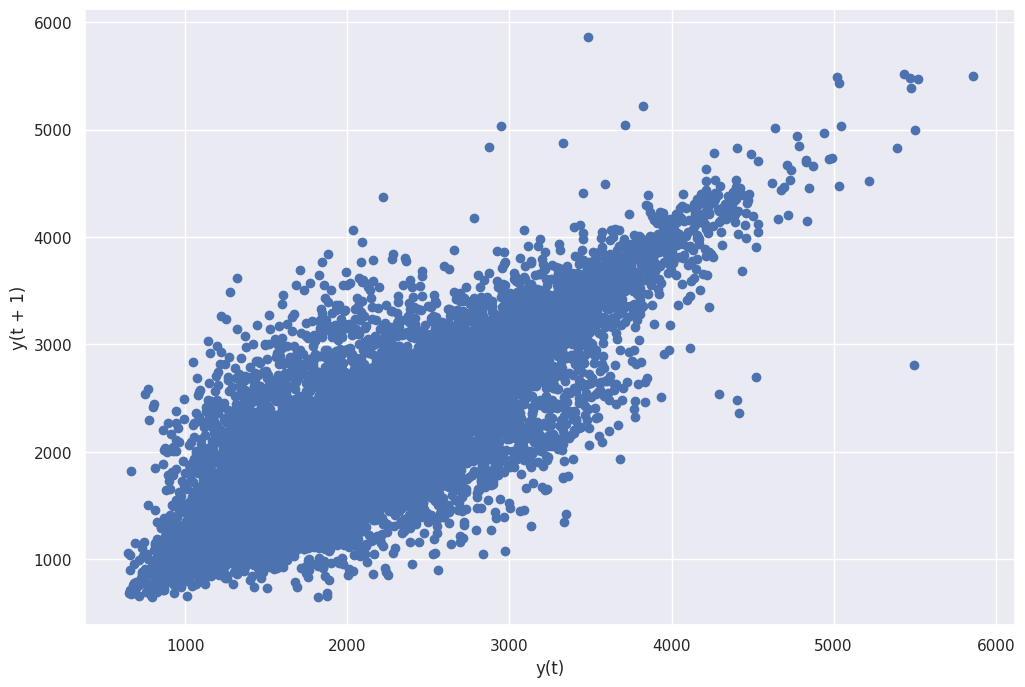

In [338]:
pd.plotting.lag_plot(data['fixing volume1(MWh)'],lag=1) # check the distribution pattern by scatter plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

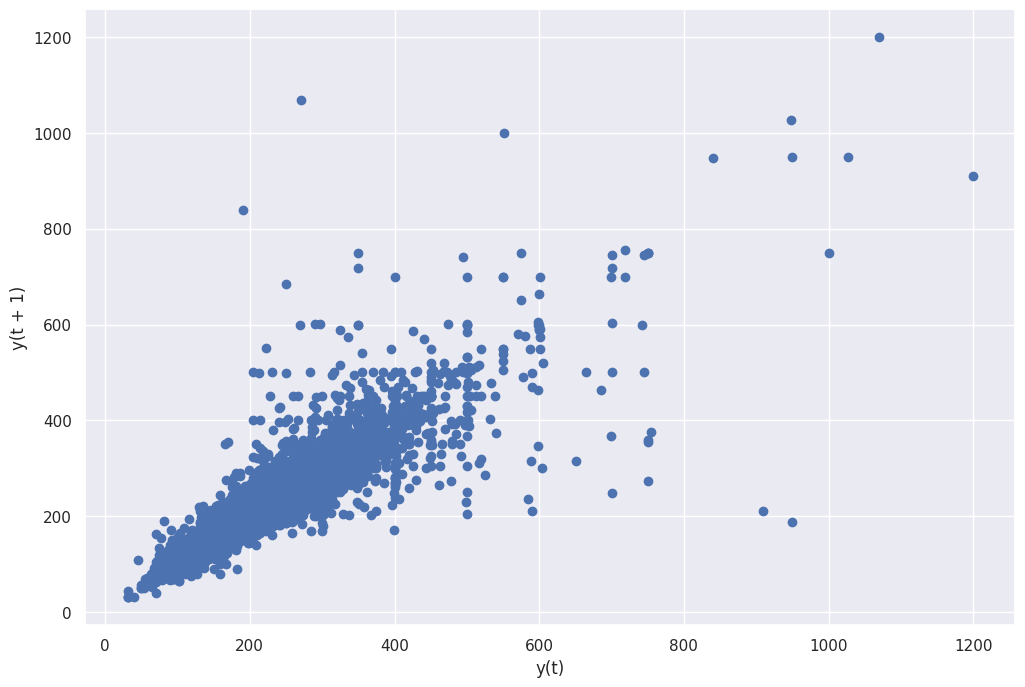

In [339]:
pd.plotting.lag_plot(data['fixing rate1(PLN/MWh)'],lag=1)

In [340]:
df_corr = data.corr(method='pearson')
df_corr

,fixing rate1(PLN/MWh),fixing volume1(MWh),fixing rate2 (PLN/MWh),fixing volume2 (MWh)
fixing rate1(PLN/MWh),1.000000,-0.074346,0.958302,0.284295
fixing volume1(MWh),-0.074346,1.000000,-0.056592,0.180239
fixing rate2 (PLN/MWh),0.958302,-0.056592,1.000000,0.247673
fixing volume2 (MWh),0.284295,0.180239,0.247673,1.000000


<Axes: >

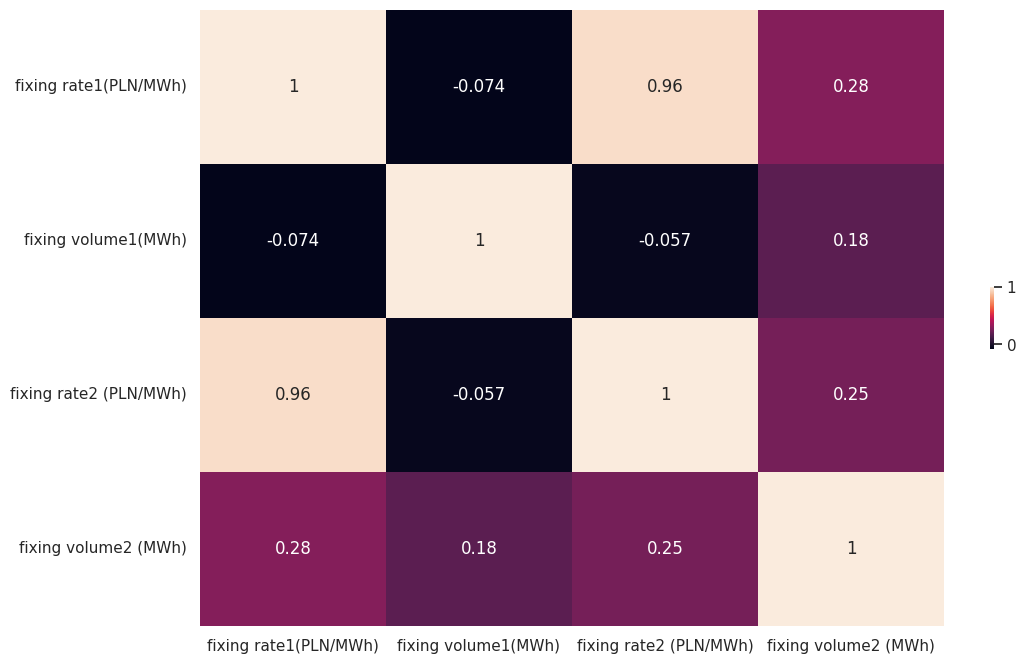

In [341]:
sns.heatmap(df_corr,annot=True,cbar_kws={'shrink':.10},xticklabels='auto')